<a href="https://colab.research.google.com/github/Geetika2282/Deep-Learning/blob/main/Single_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = (iris.target != 0).astype(int)  # Convert to binary classification (0 vs not-0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for back propagation
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize weights and bias
def initialize_weights(input_dim):
  weights = np.random.randn(input_dim, 1)
  bias = np.random.randn(1)
  return weights, bias

### Train the network

In [8]:
def train_perceptron(X, y, lr=0.01, epochs=1000):
    # Initialize weights and bias
    weights, bias = initialize_weights(X.shape[1])
    m = X.shape[0]  # Number of samples

    for epoch in range(epochs):
        # Linear combination
        z = np.dot(X, weights) + bias
        # Apply sigmoid activation
        predictions = sigmoid(z)

        # Compute the loss (binary cross-entropy)
        loss = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

        # Backpropagation
        dw = (1 / m) * np.dot(X.T, (predictions - y.reshape(-1, 1)))
        db = (1 / m) * np.sum(predictions - y.reshape(-1, 1))

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias


In [9]:
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return (predictions > 0.5).astype(int)  # Threshold at 0.5


In [10]:
weights, bias = train_perceptron(X_train, y_train, lr=0.1, epochs=1000)
# Predict on test set
y_pred = predict(X_test, weights, bias)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 0, Loss: 161.3170
Epoch 100, Loss: 75.2506
Epoch 200, Loss: 87.7306
Epoch 300, Loss: 98.5403
Epoch 400, Loss: 107.7338
Epoch 500, Loss: 115.6623
Epoch 600, Loss: 122.6141
Epoch 700, Loss: 128.7990
Epoch 800, Loss: 134.3690
Epoch 900, Loss: 139.4360
Accuracy: 51.21%


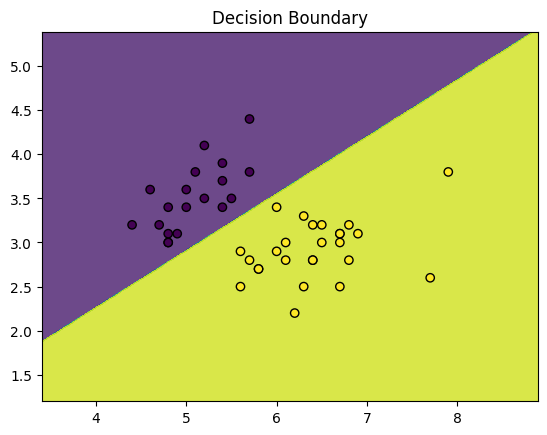

In [11]:
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_test, y_test, weights, bias)


# Using tensorflow

In [12]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = (iris.target != 0).astype(int)  # Binary classification (0 vs not-0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features for better training
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)


### Single layer neural network
- One layer (output layer) with sigmoid single neuron (that introduces non linearity)
- Trainable weights and biases
- Whereas a perceptron has step activation function and can only solve linearly separable problems

In [14]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the model

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6654 - loss: 0.6355 - val_accuracy: 0.6667 - val_loss: 0.6085
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6695 - loss: 0.6303 - val_accuracy: 0.6667 - val_loss: 0.6063
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6890 - loss: 0.6161 - val_accuracy: 0.6667 - val_loss: 0.6040
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6832 - loss: 0.6210 - val_accuracy: 0.6667 - val_loss: 0.6018
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7126 - loss: 0.6137 - val_accuracy: 0.6667 - val_loss: 0.5997
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7126 - loss: 0.6117 - val_accuracy: 0.6667 - val_loss: 0.5976
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7321 - loss: 0.6188 - val_accuracy: 0.6667 - val_loss: 0.5954
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7321 - loss: 0.6078 - val_accuracy: 0.6667 - val_loss: